<a href="https://colab.research.google.com/github/Flonsbob/Floris-van-Eisden---Exam---Applied-Statistics-and-Modeling/blob/Alternative-Branch-in-case-I-need-it/Exam_assignment_Final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [474]:
#imporing everything at the very beginning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import validation_curve
from	sklearn.model_selection	import cross_val_score
from math import log
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [475]:
#upload the data
from google.colab import files
files.upload()

Saving adrenal_tumour.csv to adrenal_tumour (3).csv


{'adrenal_tumour.csv': b'0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,status\n228.53,1554.8,237.34,51.33,72.0,56.17,984.06,93.83,149.27,261.54,166.44,63.8,220.78,1547.7,46.26,368.91,251.85,124.46,256.95,91.88,6.38,734.57,384.9,1084.0,264.41,5.92,360.39,2.27,153.04,61.81,173.95,16.68,CTL\n272.74,1506.8,581.43,113.7,440.65,60.05,1548.2,118.75,113.8,1025.5,1962.7,74.24,382.88,2781.2,43.66,778.75,879.3,169.63,223.12,93.53,24.12,957.95,448.07,2228.3,390.51,7.23,342.35,13.19,141.35,50.09,171.9,113.09,CTL\n264.82,1769.4,98.33,79.73,234.27,43.05,1309.4,155.1,65.93,725.83,268.07,124.63,174.45,4109.9,43.7,346.14,506.0,72.75,293.58,175.82,18.33,805.95,909.2,893.96,165.23,6.78,244.43,6.54,123.03,23.66,194.11,29.12,CTL\n103.07,609.4,169.51,162.96,297.85,2.51,501.28,38.3,28.95,358.07,89.14,40.21,89.41,544.52,0.0,260.15,188.49,88.37,336.91,32.25,60.3,1366.6,177.81,525.5,70.3,1.94,190.84,2.28,26.78,16.63,38.72,15.26,CTL\n100.04,1062.5,100.79,39.67,31.74,32.73,9

In [476]:
#create dataframe (df)
df = pd.read_csv('adrenal_tumour.csv')

In [ ]:
df.keys()
#tumor status is in column 32

In [ ]:
df.status
#values of the status column are a 3-character string object

In [ ]:
df.describe()
#the values are probably not normally distributed

In [ ]:
df.info()
#imputation is needed

In [ ]:
#Makes a list out of the keys of the dataframe. This is needed for the for-loop that makes the histograms.
keys_list_df = df.keys() 

In [ ]:
#For-loop that creates a histogram of the count of each column in the dataframe. The data is divided between the three groups: Control (CTL),  malignant carcinoma (ACC) and adrenocortical adenoma (ACA).
for col in keys_list_df:
  sns.histplot(data= df, x=df[col], hue=df['status'])
  plt.show()

In [ ]:
#The data is not normally distributed, but does have some characteristics of a normal distribution

In [477]:
#Returns the natural logarithm of (the input + 1)
transformer = FunctionTransformer(np.log1p)

In [ ]:
#Check that the transformer works
xxx = [10.0]
transformer.transform(xxx)

In [478]:
#Create a new dataframe (EXperimental_DataFrame) that is equal to df.
#Remove control data from ex_df
ex_df = df.copy()

for index, row in ex_df.iterrows():
    """function that removes control data from ex_df"""
    if row['status'] == 'CTL':
        ex_df.drop(index, inplace=True)

In [ ]:
#Check to see that CTL was removed from ex_df
df['status']

In [ ]:
#Check to see that CTL was removed from ex_df
ex_df['status']

In [479]:
#creates y that is the status column of ex_df
y = ex_df['status']
#creates X that is qual to ex_df\
X = ex_df
#Removes the status column from X but not from ex_df
X = X.drop(columns = 'status')

In [ ]:
#check to see that y is ex_df['status']
print(y)

In [ ]:
#status column is still in ex_df
ex_df.info()

In [ ]:
#status column is not in X anymore
X.info()

In [ ]:
#transformer.fit(X,y)         #####  needed when it is finished

In [ ]:
#Results look as expected. 
#zzz = transformer.transform(X)         #####  needed when it is finished

In [ ]:
#I took the ln of some of these values to see if the above results of the transformer were acceptable.
X.describe()

In [480]:
#Define an imputer. Imputer uses median
imp = SimpleImputer(strategy='median')

In [ ]:
#imp.fit(X,y)                           #####  needed when it is finished

In [481]:
#Sets up a logistic regression model
model = LogisticRegression(penalty="l2", C=1, solver="saga", max_iter=10000)

In [482]:
#pipline that starts with the imputer then uses the logarithmic function transformer and then the model
#imp and model are defined just above, the transformer was defined and tested (but not used) earlier.
pipe = Pipeline([('imp', imp),
                 ('transformer', transformer),
                 ('model', model)])

In [483]:
pipe.fit(X,y)

Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                ('transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('model',
                 LogisticRegression(C=1, max_iter=10000, solver='saga'))])

In [ ]:
#C parameter of the model is called 'model_C' in the pipeline
pipe.get_params()

In [484]:
#Returns a validation curve and a training curve to evaluate the optimal value for C in the model. 
## the x axis represents the C value 
## The x values are powers of 10. 
## The y axis represents roc_auc.
range_C_parameter = np.power(10, np.arange(-5,1,0.5))
train_scores, val_scores = validation_curve(pipe, X, y,
                                          param_name = 'model__C', 
                                          param_range = range_C_parameter, 
                                          cv = 5,
                                          scoring = "roc_auc")

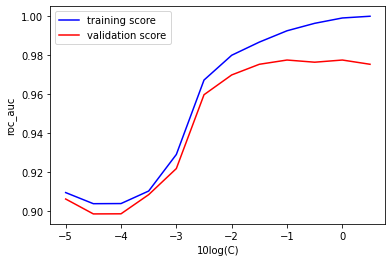

In [485]:
#Creates a plot to determine the optimal value for the C parameter.
plt.plot(np.log(range_C_parameter)/log(10.0), np.mean (train_scores, 1), color='blue', label='training score')
plt.plot(np.log(range_C_parameter)/log(10.0), np.mean(val_scores, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('10log(C)')
plt.ylabel("roc_auc");

In [486]:
#Gives the mean and standard deviation of the roc_auc. Is bugged!
def score_model(model,	X,	y):
		scores	=	cross_val_score(model,	X,	y,	cv=5,	scoring='roc_auc')
		print("%0.3f	AUC	with	a	standard	deviation	of	%0.3f" % (scores.mean(),	scores.std()))

In [ ]:
#relocate???
#Calls the function score_model. Input is X and y and pipeline (imp,transform,model). Output is be the mean and standard deviation of the roc_auc of the model after imputing and transformation.
#should use C=1 input for the model
score_model(pipe,X,y)

In [ ]:
pipe.get_params()

In [487]:
#Sets the C parameter in the LogisticRegression model to 0.1
pipe.set_params(model__C = 0.1)

Pipeline(steps=[('imp', SimpleImputer(strategy='median')),
                ('transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('model',
                 LogisticRegression(C=0.1, max_iter=10000, solver='saga'))])

In [488]:
#relocate???
#Calls the function score_model. Input is X and y and pipeline (imp,transform,model). Output is be the mean and standard deviation of the roc_auc of the model after imputing and transformation.
#should use C=0.1 input for the model
score_model(pipe,X,y)

0.977	AUC	with	a	standard	deviation	of	0.025


In [489]:
#New imputer. Uses the 10 nearest neighbours to fill in missing values.
imp2 = KNNImputer(n_neighbors=10)

In [490]:
#Same as pipe except that is uses a KNNImputer instead of the SimpleImputer
pipe1 = Pipeline([('imp2', imp2),
                 ('transformer', transformer),
                 ('model', model)])

In [491]:
pipe1.fit(X,y)

Pipeline(steps=[('imp2', KNNImputer(n_neighbors=10)),
                ('transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('model',
                 LogisticRegression(C=0.1, max_iter=10000, solver='saga'))])

In [492]:
#Same validation cuve as before but with the new imputer the data is different.
range_C_parameter = np.power(10, np.arange(-5,1,0.5))
train_scores1, val_scores1 = validation_curve(pipe1, X, y,
                                          param_name = 'model__C', 
                                          param_range = range_C_parameter, 
                                          cv = 5,
                                          scoring = "roc_auc")

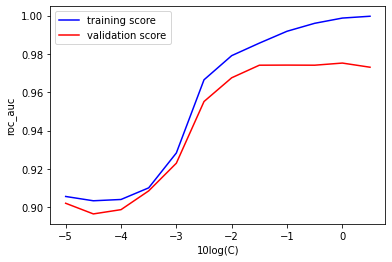

In [493]:
#Creates a plot to determine the optimal value for the C parameter.
plt.plot(np.log(range_C_parameter)/log(10.0), np.mean (train_scores1, 1), color='blue', label='training score')
plt.plot(np.log(range_C_parameter)/log(10.0), np.mean(val_scores1, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('10log(C)')
plt.ylabel("roc_auc");

In [494]:
#Sets the model__C prameter in pipe1 to 10**-1.5.
pipe1.set_params(model__C = 0.03162277)

Pipeline(steps=[('imp2', KNNImputer(n_neighbors=10)),
                ('transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('model',
                 LogisticRegression(C=0.03162277, max_iter=10000,
                                    solver='saga'))])

In [ ]:
score_model(pipe1,X,y)
#the model got worse for some reason

In [495]:
#trying the other peak.
#Sets the model__C prameter in pipe1 to 10**0.
pipe1.set_params(model__C = 1)

Pipeline(steps=[('imp2', KNNImputer(n_neighbors=10)),
                ('transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('model',
                 LogisticRegression(C=1, max_iter=10000, solver='saga'))])

In [ ]:
score_model(pipe1,X,y)
#slightly better than the previous one, but still worse than with SimpleImputer

In [496]:
model2 = GaussianNB()

In [497]:
#pipe2 is different from pipe because it uses the KNNImputer and the GaussianNaïveBayes model
pipe2 = Pipeline([('imp2', imp2),
                 ('transformer', transformer),
                 ('model2', model2)])

In [498]:
pipe2.fit(X,y)

Pipeline(steps=[('imp2', KNNImputer(n_neighbors=10)),
                ('transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('model2', GaussianNB())])

In [ ]:
score_model(pipe2,X,y)
#again the model got worse for some reason

In [499]:
model3 = XGBClassifier()

In [500]:
pipe3 = Pipeline([('imp2', imp2),
                 ('transformer', transformer),
                 ('model3', model3)])

In [501]:
pipe3.fit(X,y)

Pipeline(steps=[('imp2', KNNImputer(n_neighbors=10)),
                ('transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('model3', XGBClassifier())])

In [ ]:
score_model(pipe3,X,y)
#slightly better than befor, but still worst than logistic regression

In [502]:
#New logistic regression model has L1 regularisation instead of L2. 
model4 = LogisticRegression(penalty="l1", C=1, solver="saga", max_iter=10000)

In [503]:
pipe4 = Pipeline([('imp2', imp2),
                 ('transformer', transformer),
                 ('model4', model4)])

In [504]:
pipe4.fit(X,y)

Pipeline(steps=[('imp2', KNNImputer(n_neighbors=10)),
                ('transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('model4',
                 LogisticRegression(C=1, max_iter=10000, penalty='l1',
                                    solver='saga'))])

In [ ]:
#pipe4 uses a different model so the name of the C prameter has changed
pipe4.get_params()

In [505]:
#Validation cuve again. It uses the new imputer and it uses the new LogisticRegression model
range_C_parameter = np.power(10, np.arange(-5,1,0.5))
train_scores4, val_scores4 = validation_curve(pipe4, X, y,
                                          param_name = 'model4__C', 
                                          param_range = range_C_parameter, 
                                          cv = 5,
                                          scoring = "roc_auc")

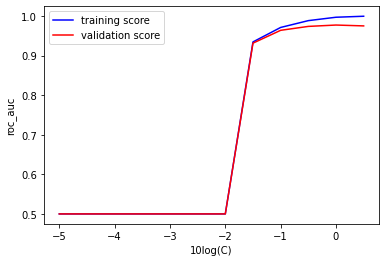

In [506]:
#Creates a plot to determine the optimal value for the C parameter.
plt.plot(np.log(range_C_parameter)/log(10.0), np.mean (train_scores4, 1), color='blue', label='training score')
plt.plot(np.log(range_C_parameter)/log(10.0), np.mean(val_scores4, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('10log(C)')
plt.ylabel("roc_auc");

In [ ]:
score_model(pipe4,X,y)

In [507]:
# Set the C parameter of model4 to 10 ** 0
pipe4.set_params(model4__C = 1)

Pipeline(steps=[('imp2', KNNImputer(n_neighbors=10)),
                ('transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('model4',
                 LogisticRegression(C=1, max_iter=10000, penalty='l1',
                                    solver='saga'))])

In [ ]:
#The model didn't get any better
score_model(pipe4,X,y)

In [508]:
pipe4.fit(X,y)

Pipeline(steps=[('imp2', KNNImputer(n_neighbors=10)),
                ('transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('model4',
                 LogisticRegression(C=1, max_iter=10000, penalty='l1',
                                    solver='saga'))])

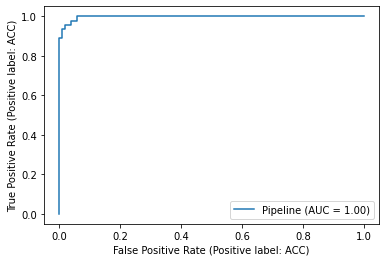

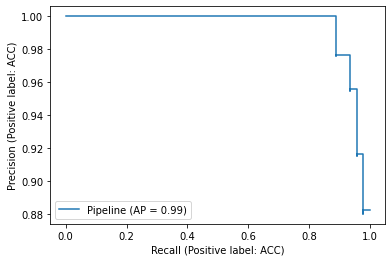

In [509]:
#Plots ROC curve for pipe4 
pipe4[-1].coef_
RocCurveDisplay.from_estimator(pipe4, X, y)
PrecisionRecallDisplay.from_estimator(pipe4, X, y)

In [ ]:
#

In [510]:
Y = y.copy

In [511]:
y = y.replace(['ACC'],'1')

In [512]:
y = y.replace(['ACA'], '0'    )

In [513]:
pipe4.fit(X,y)

Pipeline(steps=[('imp2', KNNImputer(n_neighbors=10)),
                ('transformer', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('model4',
                 LogisticRegression(C=1, max_iter=10000, penalty='l1',
                                    solver='saga'))])

In [534]:
pred4 = pipe4.predict(X[['0']+['1']+['2']+['3']+['4']+['5']+['6']+['7']+['8']+['9']+['10']+['11']+['12']+['13']+['14']+['15']+['16']+['17']+['18']+['19']+['20']+['21']+['22']+['23']+['24']+['25']+['26']+['27']+['28']+['29']+['30']+['31']])

In [528]:
pred4_class = pred4.astype('int')

In [517]:
### Converting predicted values into classes using threshold
threshold=0.5

pred4_class1=np.zeros(pred4.shape)

In [535]:
pred4

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0'], dtype=object)

In [529]:
pred4_class

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [530]:
threshold=0.5

pred4_class1[pred4_class>threshold]=1
pred4_class1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(X['0'], pred4)